<p style="font-family: Arial; font-size:2.00em;color:#2462C0; font-style:bold">
Credit Card Customer Segmentation using K-Means Clustering<br>
</p>

<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Importing Python Libraries</p>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
#import pandas_profiling

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

<p style="font-family: Arial; font-size:1.75em;color:Red; font-style:bold">
Dataset Description</p>
<br>
The are total 18 columns in the dataset given

Link to the dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

Following is the Data Dictionary for Credit Card dataset:

CUST_ID: Identification of Credit Card holder (Categorical)
BALANCE: Balance amount left in their account to make purchases
BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES: Amount of purchases made from account
ONEOFF_PURCHASES: Maximum purchase amount done in one-go
INSTALLMENTS_PURCHASES: Amount of purchase done in installment
CASH_ADVANCE: Cash in advance given by the user
PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
PURCHASES_TRX: Number of purchase transactions made
CREDIT_LIMIT: Limit of Credit Card for user
PAYMENTS: Amount of Payment done by user
MINIMUM_PAYMENTS: Minimum amount of payments made by user
PRCFULLPAYMENT: Percent of full payment paid by user
TENURE: Tenure of credit card service for user
    Two columns namely "CREDIT_LIMIT" and "MINIMUM_PAYMENTS" are having NULL values.
    "CREDIT_LIMIT" - NULL will be filled with median and for "MINIMUM_PAYMENTS" - NULL will be filled with ZERO.

In [2]:
credit= pd.read_csv(r'C:\Users\user\Desktop\BTECH\MAJOR PROJECT\FunalProject-edx\CC_GENERAL.csv')

In [3]:
credit.head(12)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
credit.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [6]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


    NULL Handling -

In [8]:
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [9]:
credit.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
credit['CREDIT_LIMIT'].isnull().value_counts()

False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

In [11]:
credit['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8637
True      313
Name: MINIMUM_PAYMENTS, dtype: int64

In [12]:
# For CREDIT_LIMIT - We will fill the NULL with the median of CREDIT_LIMIT
credit['CREDIT_LIMIT'].fillna(value=credit['CREDIT_LIMIT'].median(), inplace = True)

In [13]:
# For MINIMUM_PAYMENTS we will fill NULL with ZERO
credit['MINIMUM_PAYMENTS'] = credit['MINIMUM_PAYMENTS'].fillna(0)

In [14]:
credit.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Now we drop CUST_ID column, then normalize the input values using StandardScaler().

In [17]:

# drop ID col
data= credit.drop('CUST_ID', 1)

data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
# normalize values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled.shape
print(data_scaled)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.2973097  -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.10204243  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.08848934 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.32175099  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.33316552  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.31923775 -0.52555097
  -4.12276757]]


In [19]:
data_scaled.shape

(8950, 17)

In [20]:
data_imputed = pd.DataFrame(data_scaled, columns=data.columns)
data_imputed.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.297310,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.102042,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.088489,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.357035,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.252238,-0.525551,0.36068


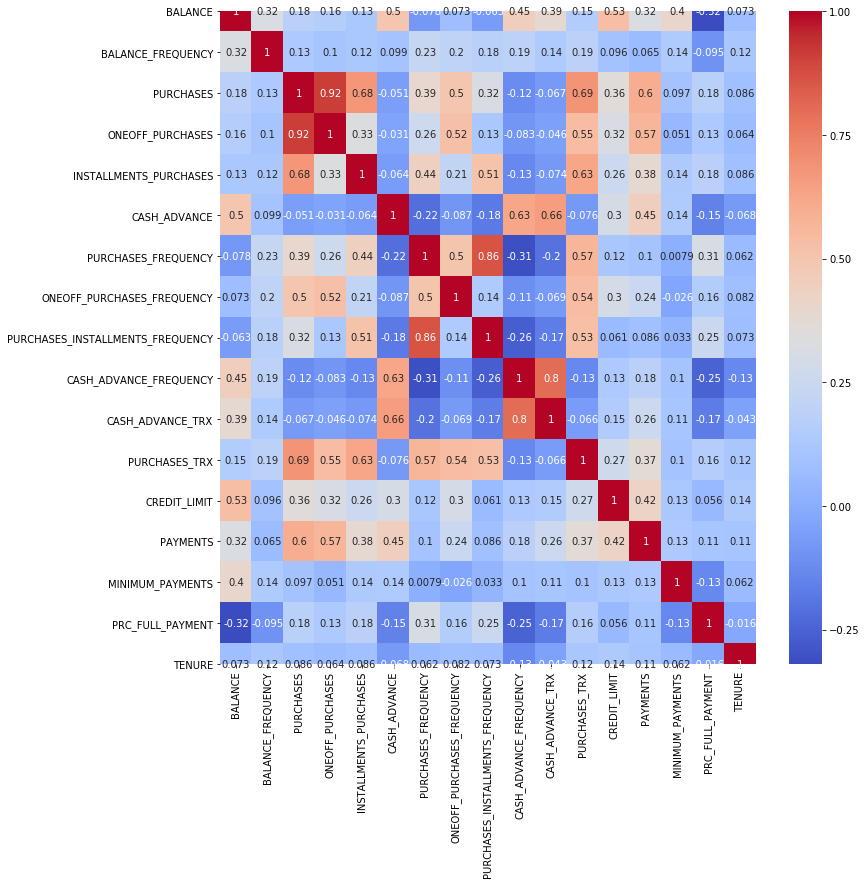

In [21]:

plt.figure(figsize = (12, 12))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', 
            xticklabels=data_imputed.columns,
            yticklabels=data_imputed.columns)

In [87]:

def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o', color = 'red')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

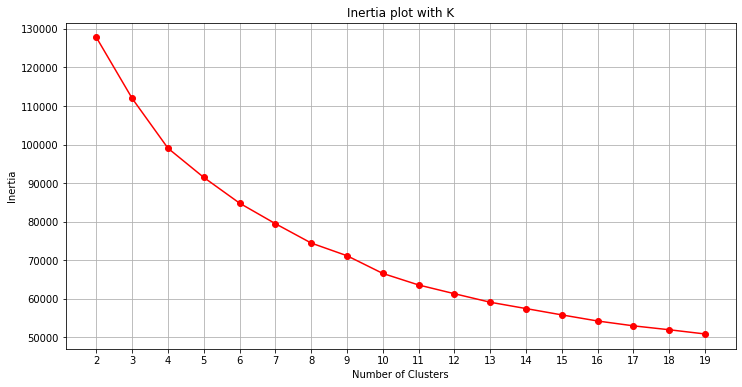

In [88]:
inertia_plot(KMeans, data_imputed)

In [39]:

credit['MNTHLY_AVG_PURCHASE'] = credit['PURCHASES']/credit['TENURE']

In [40]:

credit['MONTHLY_AVG_CASH_ADVANCE'] = credit['CASH_ADVANCE']/credit['TENURE']

In [41]:
# function for defining purchase type
#4 types of purchase behavior
def purchaagetyp(credit):
    if ((credit.ONEOFF_PURCHASES == 0) & (credit.INSTALLMENTS_PURCHASES == 0)):
        return 'NONE'
    if ((credit.ONEOFF_PURCHASES > 0) & (credit.INSTALLMENTS_PURCHASES == 0)):
        return 'ONE_OFF'
    if ((credit.ONEOFF_PURCHASES > 0) & (credit.INSTALLMENTS_PURCHASES > 0)):
        return 'BOTH_ONEOFF_INSTALLMENT'
    if ((credit.ONEOFF_PURCHASES == 0) & (credit.INSTALLMENTS_PURCHASES > 0)):
        return 'INSTALLMENTS'

In [42]:
#Purchase by Type
credit['PURCHASE_TYPE'] = credit.apply(purchaagetyp, axis=1)

In [75]:
#LIMIT USAGE (Credit Score - Lower implies customers are maintaining their balance properly)
credit['LIMIT_USAGE'] = credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'],axis =1)

In [45]:
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
MNTHLY_AVG_PURCHASE                 False
MONTHLY_AVG_CASH_ADVANCE            False
PURCHASE_TYPE                       False
PAYMENT_MINPAYMENT                  False
dtype: bool

In [46]:
credit=credit.round(2)

In [47]:

credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MNTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,PURCHASE_TYPE,PAYMENT_MINPAYMENT
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,...,2,1000.0,201.80,139.51,0.00,12,7.95,0.00,INSTALLMENTS,1.45
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,...,0,7000.0,4103.03,1072.34,0.22,12,0.00,536.91,NONE,3.83
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,...,12,7500.0,622.07,627.28,0.00,12,64.43,0.00,ONE_OFF,0.99
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,...,1,7500.0,0.00,0.00,0.00,12,124.92,17.15,ONE_OFF,0.00
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,...,1,1200.0,678.33,244.79,0.00,12,1.33,0.00,ONE_OFF,2.77


In [48]:

credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['PAYMENT_MINPAYMENT']))

PURCHASE_TYPE
BOTH_ONEOFF_INSTALLMENT    10.067787
INSTALLMENTS               20.050496
NONE                       15.328521
ONE_OFF                    41.136110
dtype: float64

#### Insights
    1 Customers with installment payments are paying dues
    2 Customers who do not do ONOFF or INSTALLMENTS take more cash advance
    3 Customers with installment purchases have good credit score

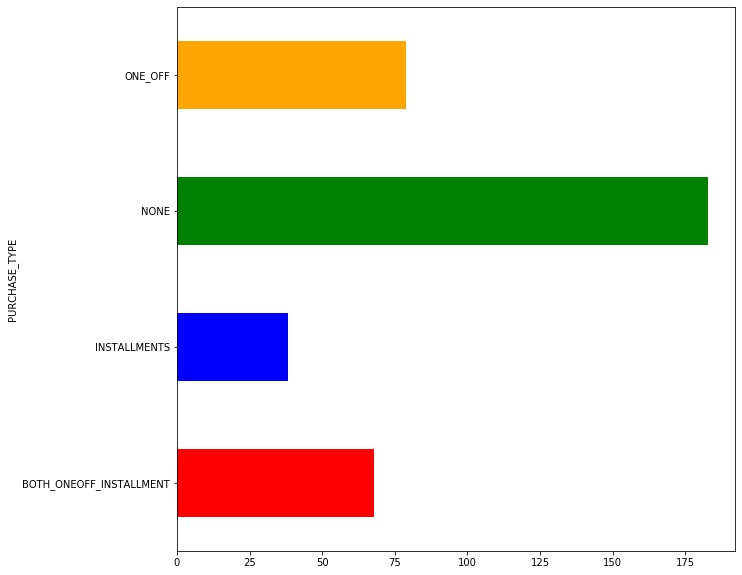

In [73]:
credit.groupby('PURCHASE_TYPE').apply(lambda x : np.mean(x['MONTHLY_AVG_CASH_ADVANCE'])).plot.barh(grid = False, color=['red','blue','green','orange','black'],figsize=(10,10))

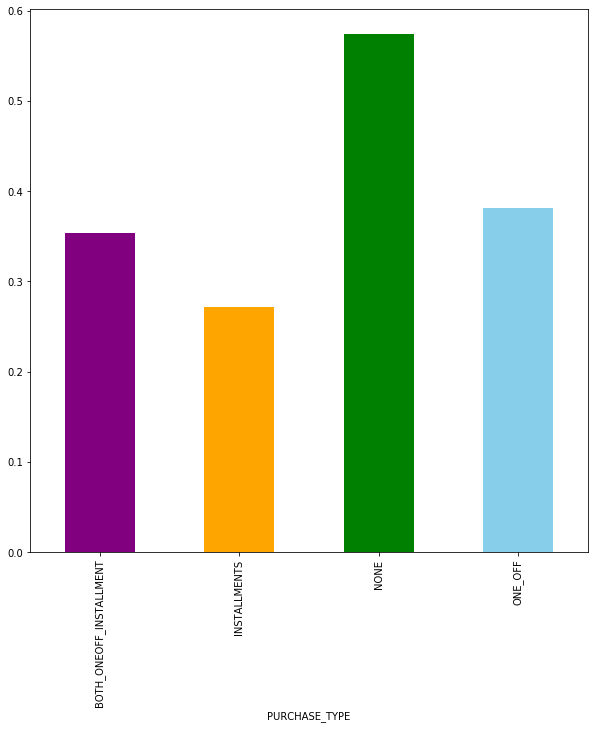

In [79]:
credit.groupby('PURCHASE_TYPE').apply(lambda x : np.mean(x['LIMIT_USAGE'])).plot.bar(grid = False, color=['purple','orange','green','skyblue','black'],figsize=(10,10))

## Clustering Using K-Means

#### For 6 cluster Solution behavior  -

In [82]:
from sklearn.cluster import KMeans

In [83]:
km_6=KMeans(n_clusters=6,random_state=123)

In [84]:
km_6.fit(data_final)
km_6.labels_

array([0, 3, 1, ..., 0, 0, 0])

In [85]:
pd.Series(km_6.labels_).value_counts()

0    6124
1    1481
3    1145
4     132
2      37
5      31
dtype: int64

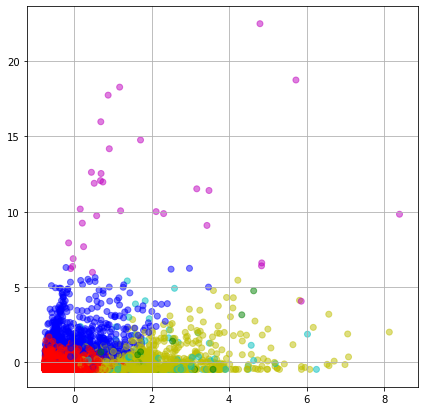

In [86]:
color_map={0:'r', 1:'b', 2:'g', 3:'y', 4:'c', 5:'m'}
label_color = [color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(data_final.iloc[:,0], data_final.iloc[:,1], c=label_color,cmap='Spectral',alpha=0.5)

#### For 6 cluster Solution behavior  -

In [24]:
# select best columns
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# dataframe with best columns
data_final = pd.DataFrame(data_imputed[best_cols])

print('New dataframe with best columns has just been created. Data shape: ' + str(data_final.shape))

New dataframe with best columns has just been created. Data shape: (8950, 6)


In [25]:
alg = KMeans(n_clusters = 6, random_state=123)
label = alg.fit_predict(data_final)
pd.Series(label).value_counts()

5    6124
0    1481
2    1145
1     132
4      37
3      31
dtype: int64

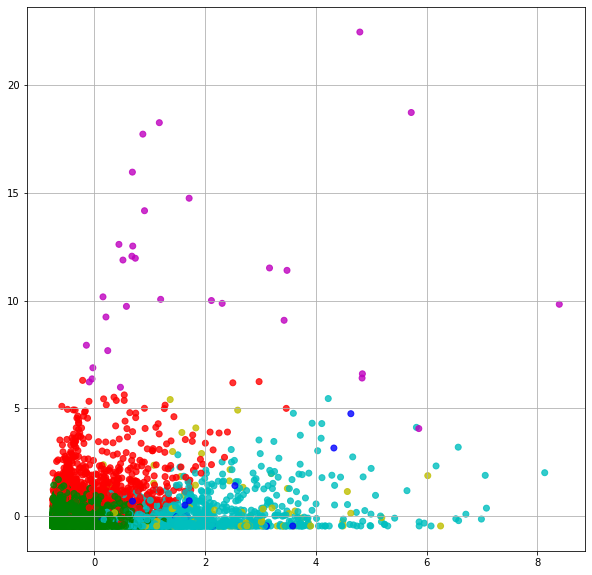

In [26]:
# apply KMeans clustering
#alg = KMeans(n_clusters = 6)
#label = alg.fit_predict(data_final)

# create a 'cluster' column
data_final['cluster'] = label
best_cols.append('cluster')

color_map={0:'r', 1:'y', 2:'c', 3:'m', 4:'b', 5:'g'}
label_color = [color_map[l] for l in label]
#color_map={0:'m', 1:'r', 2:'y', 3:'g', 4:'b', 5:'o'}
#label_color = [color_map[l] for l in label]
plt.figure(figsize=(10,10))
#plt.scatter(data_final.iloc[:,0], data_final.iloc[:,1],c=label,cmap='Oranges',alpha=1.0)
plt.scatter(data_final.iloc[:,0], data_final.iloc[:,1],c=label_color,alpha=0.8)
#plt.xlim(-1, 8)
#plt.ylim(-1, 10)

# make a Seaborn pairplot
#sns.pairplot(data_final[best_cols], hue='cluster')
#sns.scatterplot(data)

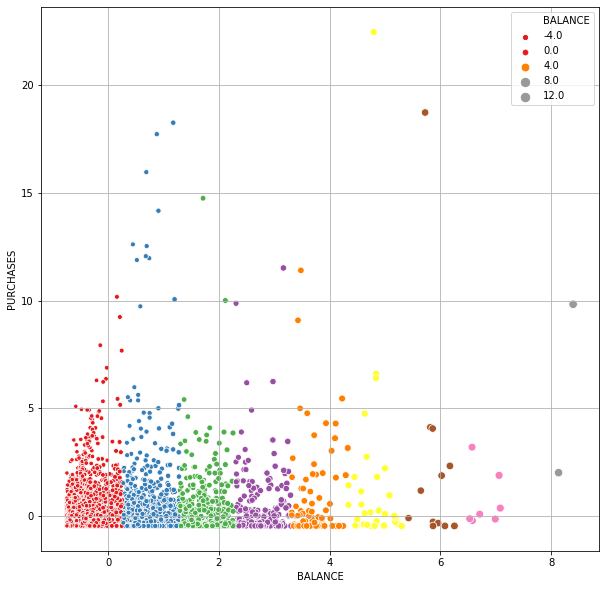

In [27]:
data_final['cluster'] = label
best_cols.append('cluster')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
#sns.scatterplot(data_final.iloc[:,0], data_final.iloc[:,1])
plt.figure(figsize=(10,10))
sns.scatterplot(x=data_final.iloc[:,0], y=data_final.iloc[:,1],hue=data_final.iloc[:,0],palette="Set1", size=data_final.iloc[:,0])

    ***************************************** THANK YOU ****************************************************

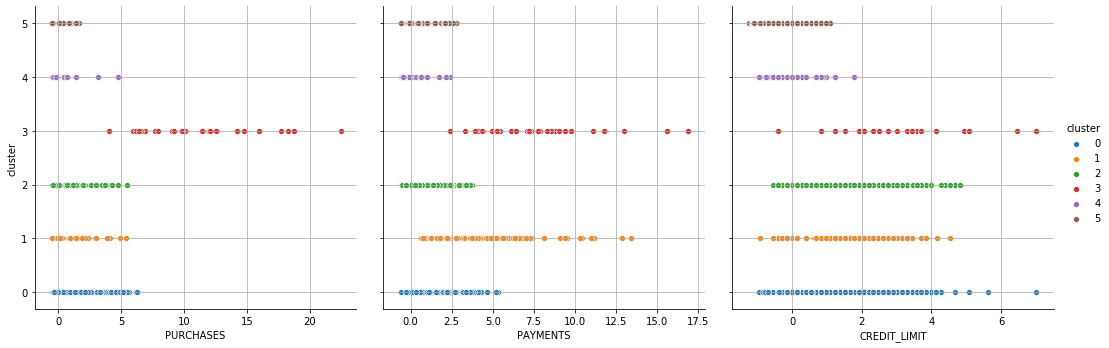

In [28]:

sns.pairplot(data_final,hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'],
            y_vars=['cluster'],
            height = 5, aspect=1)

Cluster 0 (Blue) : 
This group of users, while having the highest number of users by far, is fairly frugal: they have lowest purchases, second lowest payments, and lowest credit limit. The bank would not make much profit from this group, so there should be some sorts of strategy to attract these people more.

Cluster 1 (Orange) :
This group of users is very active in general: they have second highest purchases, 
third highest payments, and the most varied credit limit values. 
This type of credit card users is the type you should spend the least time and effort on, as they are already the ideal one.

Cluster 2 (Green) :
The Big Spenders. This group is by far the most interesting to analyze, 
since they do not only have the highest number of purchases, highest payments, 
highest minimum payments, but the other features are also wildly varied in values. 
    

Cluster 3 (Red) :
Wildly varied balance, second highest payments, average purchases. 
The special thing about this cluster is that these people have the highest cash advance by far - 
there is even one extreme case that has like 25 cash advance points. We call these people "The Money Borrowers".

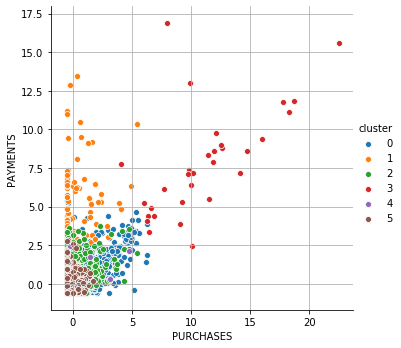

In [32]:
sns.pairplot(data_final, hue='cluster', x_vars=['PURCHASES'], y_vars=['PAYMENTS'],height=5, aspect=1)

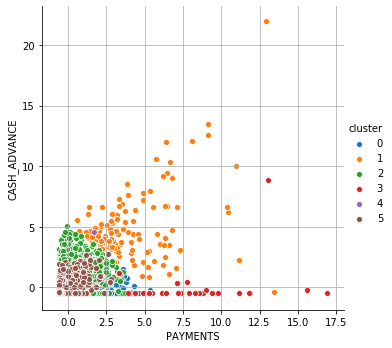

In [91]:
sns.pairplot(data_final, hue='cluster', x_vars=['PAYMENTS'], y_vars=['CASH_ADVANCE'],height=5, aspect=1)

As a nature of the "Big Spenders", there are many outliers in this cluster: 
people who have/make abnormally high balance, purchases, cash advance, and payment. 
The graph below will give you an impression of how outlier-heavy this cluster is - 
almost all the green dots are outliers relatively compared to the rest of the whole dataset.

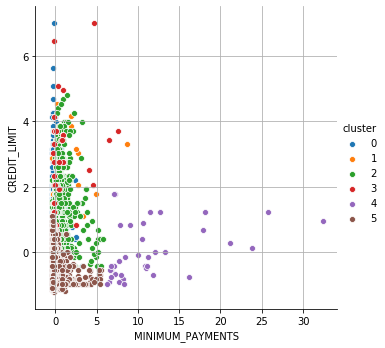

In [34]:

sns.pairplot(data_final, hue='cluster', x_vars=['MINIMUM_PAYMENTS'], y_vars=['CREDIT_LIMIT'],height=5, aspect=1)

Cluster 4 (Purple) :
This group has absurdly high minimum payments while having the second lowest credit limit. 
It looks like the bank has identified them as higher risk.

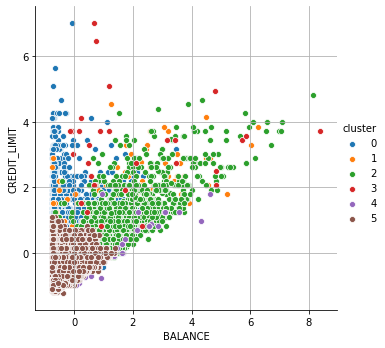

In [36]:
sns.pairplot(data_final, hue='cluster', x_vars=['BALANCE'], y_vars=['CREDIT_LIMIT'],height=5, aspect=1)

Cluster 5 (Brown) :
This group is troublesome to analyze and to come up with a good marketing strategy towards, 
as both their credit limit and balance values are wildly varied. 
As you can see, the above graph looks like half of it was made of the color brown!